In [1]:
from datasets import load_dataset

dataset = load_dataset("hf-internal-testing/example-documents")

/Users/ryanlinjui/Desktop/menu-text-detection/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from transformers import DonutProcessor, VisionEncoderDecoderModel

processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")


torch.Size([1, 3, 1280, 960])


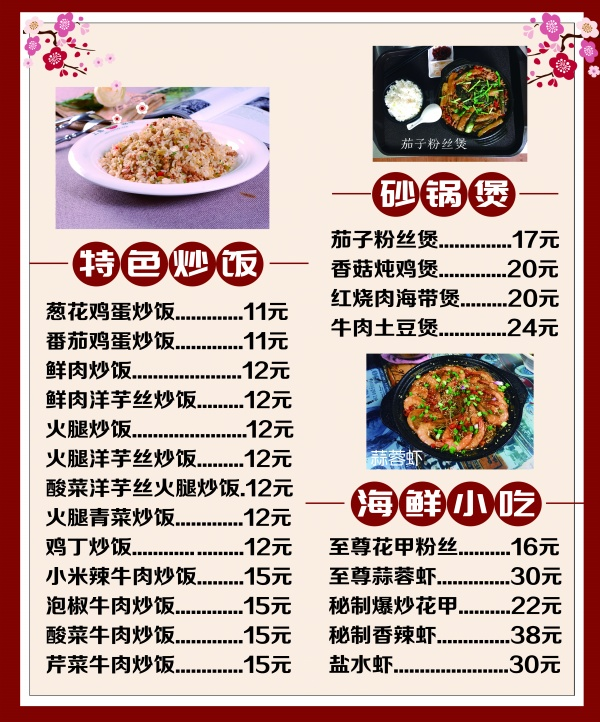

In [21]:
# image = dataset['test'][2]['image']
from PIL import Image


image_path = "/Users/ryanlinjui/Downloads/zpsd2062.jpg"
image = Image.open(image_path)

pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

image

In [22]:
import torch

task_prompt = "<s_cord-v2>"
decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt")["input_ids"]

device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device}")
model.to(device)

outputs = model.generate(pixel_values.to(device),
                               decoder_input_ids=decoder_input_ids.to(device),
                               max_length=model.decoder.config.max_position_embeddings,
                               early_stopping=True,
                               pad_token_id=processor.tokenizer.pad_token_id,
                               eos_token_id=processor.tokenizer.eos_token_id,
                               use_cache=True,
                               num_beams=1,
                               bad_words_ids=[[processor.tokenizer.unk_token_id]],
                               return_dict_in_generate=True,
                               output_scores=True,)

Using mps


In [23]:
import re

sequence = processor.batch_decode(outputs.sequences)[0]
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token
print(sequence)

<s_nm>閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩


In [24]:
processor.token2json(sequence)

{'text_sequence': '閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩閩'}